# 🪐 Exoplanet Transit Detector — Demo Notebook

This notebook demonstrates how to:
- Load a simulated exoplanet transit light curve
- Clean & normalize the data
- Run the Box Least Squares (BLS) algorithm
- Identify the best orbital period
- Plot the BLS periodogram
- Plot the folded transit curve

This notebook uses the file stored in:
`../sample-data/simulated_transit.csv`

In [2]:
!pip install astropy numpy matplotlib scipy pandas > /dev/null

## 📥 Load the Simulated Transit Light Curve

The dataset contains:
- Time (0–27 days)
- Flux values
- Injected transits every 3.21 days
- Transit depth ≈ 2%

Let's load it.

In [4]:
from google.colab import files
uploaded = files.upload()


Saving simulated_transit (1).csv to simulated_transit (1).csv


In [6]:
import os
os.listdir()


['.config', 'simulated_transit (1).csv', 'sample_data']

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('simulated_transit (1).csv')
time = df['time'].values
flux = df['flux'].values

len(time), len(flux)


(3000, 3000)

## 📈 Plot Raw Light Curve

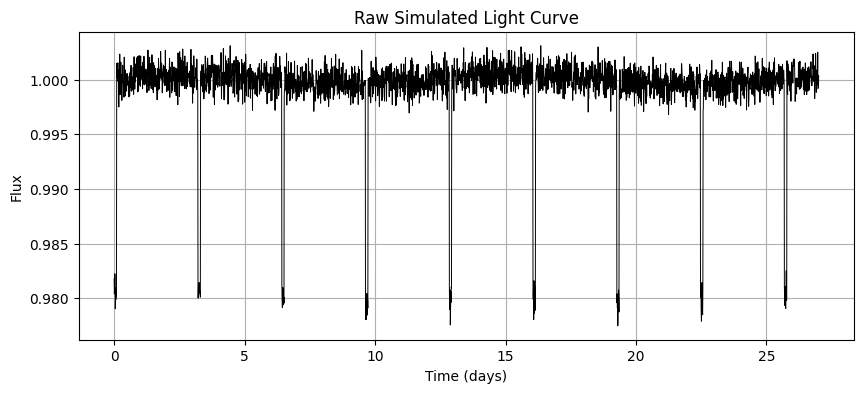

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,4))
plt.plot(time, flux, color='black', linewidth=0.7)
plt.title('Raw Simulated Light Curve')
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.grid(True)
plt.show()

## 🔍 Run BLS Transit Search

We search for periodic dips using the **Box Least Squares** algorithm.

In [11]:
from astropy.timeseries import BoxLeastSquares

periods = np.linspace(0.5, 10, 5000)  # Search 0.5 to 10 days
duration = 0.1                        # Typical transit duration

model = BoxLeastSquares(time, flux)
results = model.power(periods, duration)

best_period = results.period[np.argmax(results.power)]
best_period


np.float64(3.2099419883976794)

## 📊 Plot BLS Periodogram

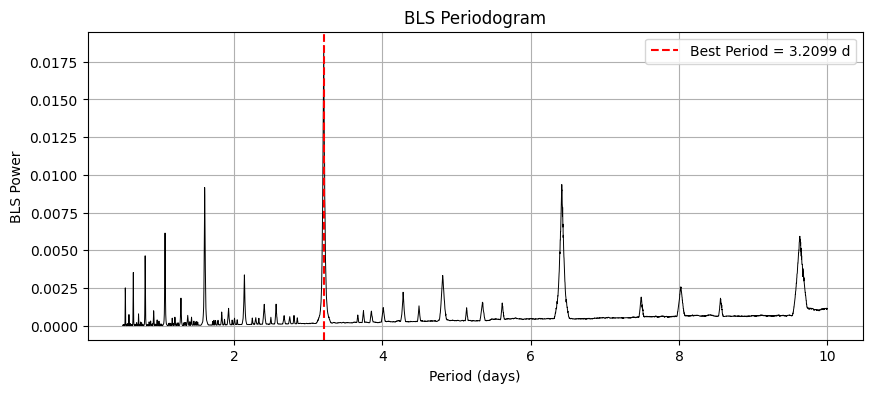

In [12]:
plt.figure(figsize=(10,4))
plt.plot(results.period, results.power, color='black', linewidth=0.7)
plt.axvline(best_period, color='red', linestyle='--', label=f'Best Period = {best_period:.4f} d')
plt.xlabel('Period (days)')
plt.ylabel('BLS Power')
plt.title('BLS Periodogram')
plt.legend()
plt.grid(True)
plt.show()

## 🔄 Plot Folded Transit Curve

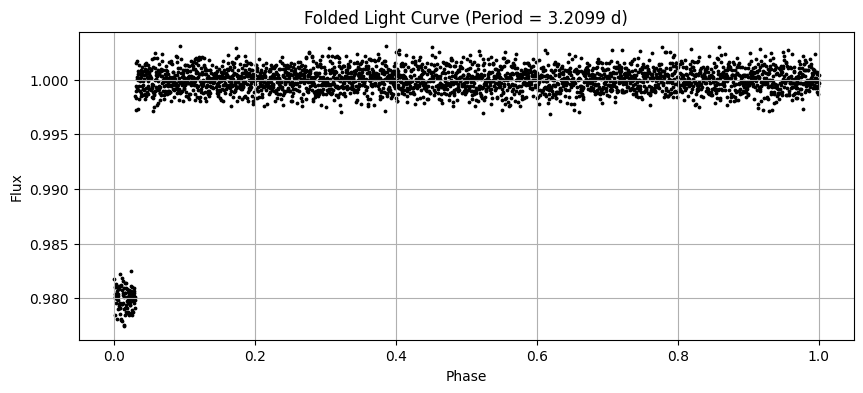

In [13]:
phase = (time % best_period) / best_period

plt.figure(figsize=(10,4))
plt.scatter(phase, flux, s=3, color='black')
plt.xlabel('Phase')
plt.ylabel('Flux')
plt.title(f'Folded Light Curve (Period = {best_period:.4f} d)')
plt.grid(True)
plt.show()